## Topic Modeling & LDA
Topic Modeling is helpful for the study of culture and history by uncovering themes and patterns in documents. With Topic Modeling, topics can be extracted over time and examined by groups, such as gender. 

#### Gender & Era
For this project, topics are explored over time and by gender. The philosophical texts are broken into three era categories, 'ancient', 'classical', and 'modern'. Ancient texts are considered to be texts written in the B.C. time period. These authors include Aristotle, Plato, Cicero, and Loa Tzu. For this study, classical philosophical texts are considered to be texts written between 1700-1900, which include the authors Hume, Mill, Kant, and Marx. Modern texts are considered texts written after 1900, including the authors Foucault, Arendt, Freire, and hooks. Topic models are also explored by gender, breaking the philosophical texts into two author gender categories 'male' and 'female'. This classification can help explore the subject between genders, and what the similarities and differences might be. This category has some problems however, due to cultural restrictions. Most of the female authors are in the modern era, because it was largely less acceptable/not permitted for women to study, write, and publish. So while there may be differences between male and female authors, some of these differences may also be influenced by era. Additionally, since women were not permitted to study, write, and publish, many wrote under pseudonyms. One example is Harriet Taylor Mill. While she did publish some of her own work, historians believe that the more famous work of her husband, John Stuart Mill, was written as a collaboration between the two. So while John Stuart Mill's publications are not attributed to a female author, Harriet Taylor Mill may have co-authored the texts, or at the very least influenced them in some way. Additionally, since most female philosophy authors are in more modern times, it is more difficult to obtain free Plain Text documents of their work. Therefore, this project contains 15 texts by male authors, and only 5 by female authors. While the distribution is not equitable, and the study of gender is problematic, topics between genders is still explored in this project, in hopes that some trends may be revealed. 

In [49]:
import pandas as pd
#topic modeling & LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import plotly_express as px

%matplotlib inline

In [50]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [51]:
n_terms = 8000
n_topics = 35
max_iter = 5
OHCO = ['title', 'author', 'para_num', 'gender', 'era']

In [52]:
#import tables
TOKENS = pd.read_csv('TOKEN2.csv')

In [53]:
TOKENS.head()

,text_id,para_num,sent_num,token_num,pos_tuple,pos,token_str,term_str,term_id,title,author,file
0,1,16,0,0,"('Every', 'DT')",DT,Every,every,15890,NicomachaenEthics,Aristotle,philostexts\Aristotle_NicomachaenEthics-1.txt
1,1,16,0,1,"('art', 'NN')",NN,art,art,2942,NicomachaenEthics,Aristotle,philostexts\Aristotle_NicomachaenEthics-1.txt
2,1,16,0,2,"('and', 'CC')",CC,and,and,1976,NicomachaenEthics,Aristotle,philostexts\Aristotle_NicomachaenEthics-1.txt
3,1,16,0,3,"('every', 'DT')",DT,every,every,15890,NicomachaenEthics,Aristotle,philostexts\Aristotle_NicomachaenEthics-1.txt
4,1,16,0,4,"('inquiry,', 'NN')",NN,"inquiry,",inquiry,23364,NicomachaenEthics,Aristotle,philostexts\Aristotle_NicomachaenEthics-1.txt


In [54]:
#create GENDER column in tokens table 
TOKENS.loc[TOKENS.author.str.contains('Aristotle'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('bellhooks'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('Cicero'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Foucault'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Freire'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('HannahArendt'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('HarrietTaylorMill'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('Hesse'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Hume'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Kant'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Kierkegaard'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Laozi'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Marx'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('MaryWollstonecraft'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('Nietzsche'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Plato'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Simonedebeauvoir'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('StuartMill'), 'gender'] = 'M'

In [55]:
#create ERA column in tokens table - ancient, classical, modern
TOKENS.loc[TOKENS.author.str.contains('Aristotle'), 'era'] = 'ancient'
TOKENS.loc[TOKENS.author.str.contains('bellhooks'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('Cicero'), 'era'] = 'ancient'
TOKENS.loc[TOKENS.author.str.contains('Foucault'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('Freire'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('HannahArendt'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('HarrietTaylorMill'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Hesse'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('Hume'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Kant'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Kierkegaard'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('Laozi'), 'era'] = 'ancient'
TOKENS.loc[TOKENS.author.str.contains('Marx'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('MaryWollstonecraft'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Nietzsche'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Plato'), 'era'] = 'ancient'
TOKENS.loc[TOKENS.author.str.contains('Simonedebeauvoir'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('StuartMill'), 'era'] = 'classical'

In [56]:
TOKENS

,text_id,para_num,sent_num,token_num,pos_tuple,pos,token_str,term_str,term_id,title,author,file,gender,era
0,1,16,0,0,"('Every', 'DT')",DT,Every,every,15890,NicomachaenEthics,Aristotle,philostexts\Aristotle_NicomachaenEthics-1.txt,M,ancient
1,1,16,0,1,"('art', 'NN')",NN,art,art,2942,NicomachaenEthics,Aristotle,philostexts\Aristotle_NicomachaenEthics-1.txt,M,ancient
2,1,16,0,2,"('and', 'CC')",CC,and,and,1976,NicomachaenEthics,Aristotle,philostexts\Aristotle_NicomachaenEthics-1.txt,M,ancient
3,1,16,0,3,"('every', 'DT')",DT,every,every,15890,NicomachaenEthics,Aristotle,philostexts\Aristotle_NicomachaenEthics-1.txt,M,ancient
4,1,16,0,4,"('inquiry,', 'NN')",NN,"inquiry,",inquiry,23364,NicomachaenEthics,Aristotle,philostexts\Aristotle_NicomachaenEthics-1.txt,M,ancient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742815,3,179,0,7,"('working', 'VBG')",VBG,working,working,49741,FeministClassStruggle,bellhooks,philostexts\bellhooks_FeministClassStruggle-3.txt,F,modern
1742816,3,179,0,8,"('class', 'NN')",NN,class,class,7384,FeministClassStruggle,bellhooks,philostexts\bellhooks_FeministClassStruggle-3.txt,F,modern
1742817,3,179,0,9,"('and', 'CC')",CC,and,and,1976,FeministClassStruggle,bellhooks,philostexts\bellhooks_FeministClassStruggle-3.txt,F,modern
1742818,3,179,0,10,"('poor', 'JJ')",JJ,poor,poor,34409,FeministClassStruggle,bellhooks,philostexts\bellhooks_FeministClassStruggle-3.txt,F,modern


In [57]:
#save work
TOKENS.to_csv('TOKEN_expanded.csv', index=False)

In [58]:
#Convert TOKENS to table of paragraphs
#group by paragraph string and set indexes
PARAS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'para_str'})
PARAS.head()

para_str
title                        author             para_num gender era                                     
AVindicationOfTheRightsofMen MaryWollstonecraft 75       F      classical  attention transient topic day
                                                76       F      classical          amusement indignation
                                                77       F      classical      arguments moment me shape
                                                78       F      classical                 feelings sense
                                                80       F      classical  pages letter effusions moment

In [59]:
'''#Convert TOKENS to table of texts
#group by text string and set indexes
TEXTS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO[:1]).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'text_str'})
TEXTS.head()'''

"#Convert TOKENS to table of texts\n#group by text string and set indexes\nTEXTS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]    .groupby(OHCO[:1]).term_str    .apply(lambda x: ' '.join(x))    .to_frame()    .rename(columns={'term_str':'text_str'})\nTEXTS.head()"

#### Create Vector Space 


In [60]:
##Vector Space
#Use Scikit Learn's CountVectorizer to convert F1 corpus of paragraphs
#into a document-term vector space of word counts.
tfv = CountVectorizer(max_features=n_terms, stop_words='english')
tf = tfv.fit_transform(PARAS.para_str)
TERMS = tfv.get_feature_names_out()

#### Generate LDA Model

In [61]:
#Generate LDA model
#SUse cikit Learn's LatentDirichletAllocation algorithm and extract the THETA and PHI tables.
lda = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

#### THETA

In [62]:
#THETA for texts
THETA = pd.DataFrame(lda.fit_transform(tf), index=PARAS.index)
THETA.columns.name = 'topic_id'
THETA.sample(10).style.background_gradient()

#### PHI

In [63]:
#PHI 
PHI = pd.DataFrame(lda.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'
PHI.T.head().style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
term_str,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ab,0.028601,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.481300,0.028571,0.042811,0.028571,0.028571,0.028571,0.028571,0.028571,0.037560,0.028571,0.028571,0.028571,0.028571,0.028574,0.028571,0.028571,0.035884,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028586,28.811053,39.762774,0.028571
abandon,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,20.028571,0.028571,0.028571,0.028571
abandoned,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,7.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571
abandonment,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,3.961899,0.108567,0.028571,0.028571,0.112090,0.028571,0.028571,0.028571,0.028571,0.044230,0.028571,0.028571,0.028571,0.028571,0.233410,0.028571,11.689153,0.028571,0.028571,0.050650,0.028571,0.028571
abasement,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,16.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571


#### Top Terms per Topic

In [64]:
TOPICS = PHI.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)
TOPICS

term_str,0,1,2,3,4,5,6,7,8,9
topic_id,,,,,,,,,,
0,character,object,strength,structure,regard,possibility,faith,true,ground,consequences
1,form,right,country,home,friends,authority,group,attempt,antisemitism,doctrine
2,things,mother,years,rights,father,need,reflection,reasons,study,music
3,nature,fact,sense,family,source,opinions,conduct,violence,community,stage
4,action,good,spirit,fear,movements,individuals,labour,values,presence,figure
5,laws,origin,head,book,possession,differences,claim,method,literature,proportion
6,virtue,soul,desire,feeling,acts,labor,term,mans,conditions,domination
7,men,body,eyes,manner,female,evil,sign,development,choice,days
8,time,education,age,objects,sex,difference,representation,position,persons,element


In [65]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ' '.join(x), 1)

#### Sort Topics by Doc Weight

<AxesSubplot:ylabel='label'>

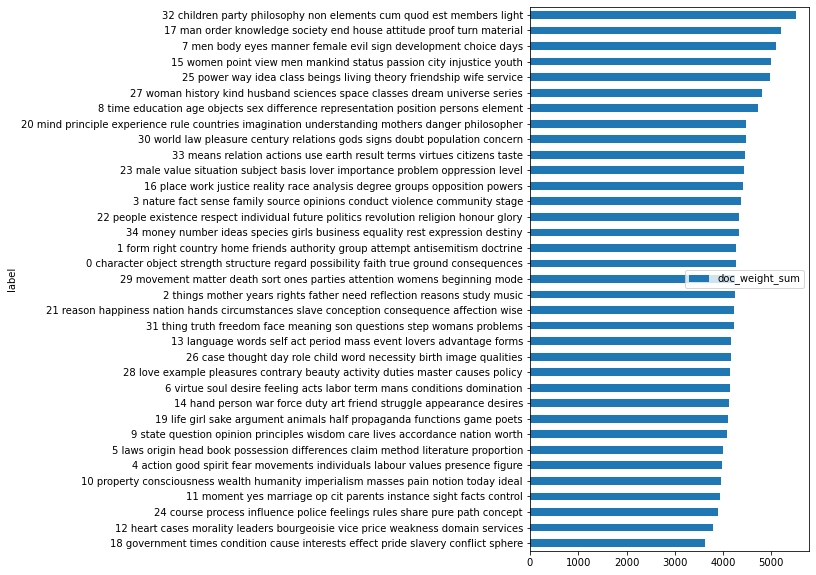

In [66]:
TOPICS['doc_weight_sum'] = THETA.sum()
TOPICS.sort_values('doc_weight_sum', 
                   ascending=True).plot.barh(y='doc_weight_sum', x='label', 
                                             figsize=(5,10)) 

### Analysis
The top topics when looking at all the philosophical texts are all pretty similar at the sum of the weights level. There are about 7 sets of topics that have the largest weights, and 5 that have the largest. Some of the most significant topics (from topic IDs 32, 17, 7, 15, 25, 27) include: children, philosophy, man, order, knowledge, society, female, evil, development, choice, women, status, passion, injustice, time, education, representation, and position.  

#### Cluster Topics

In [67]:
def plot_tree(tree, labels):
    plt.figure()
    fig, axes = plt.subplots(figsize=(5, 10))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left")
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 432x288 with 0 Axes>

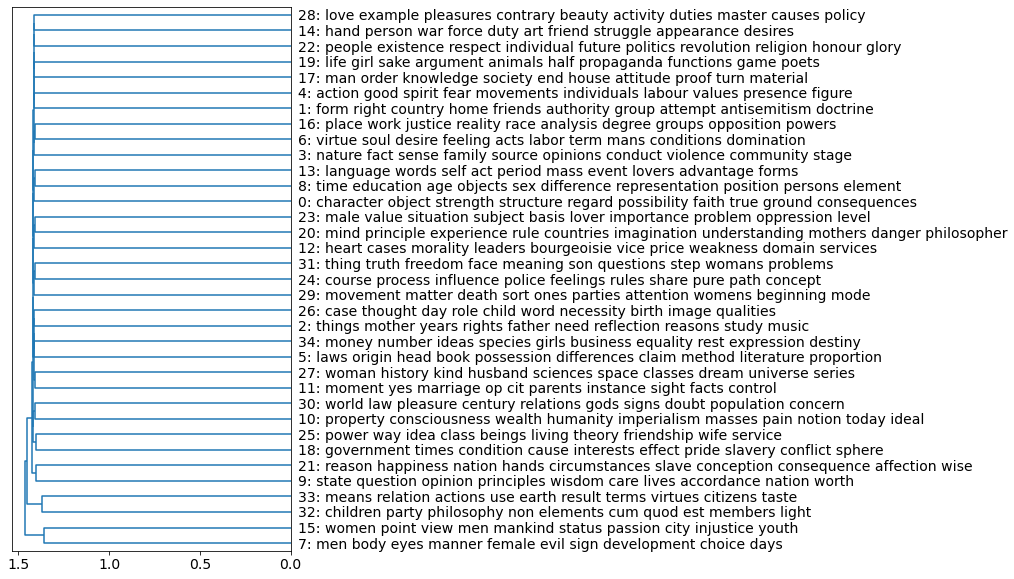

In [68]:
SIMS = pdist(normalize(PHI), metric='euclidean')
TREE = sch.linkage(SIMS, method='ward')

TOPICS['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)
labels  = ["{}: {}".format(a,b) for a, b in zip(TOPICS.index,  TOPICS.topterms.tolist())]
plot_tree(TREE, labels)

### Explore Topics by Gender

In [69]:
topic_cols = [t for t in range(n_topics)]
GENDER = THETA.groupby('gender')[topic_cols].mean().T                                            
GENDER.index.name = 'topic_id'
GENDER.T

topic_id,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
gender,,,,,,,,,,,,,,,,,,,,,
F,0.026124,0.029112,0.027390,0.027882,0.025823,0.025227,0.026177,0.033860,0.029377,0.026869,...,0.032483,0.027685,0.036153,0.028001,0.030501,0.028641,0.027024,0.027646,0.022592,0.029335
M,0.029688,0.027141,0.028406,0.029424,0.026360,0.027291,0.028060,0.033282,0.032588,0.026734,...,0.032985,0.026988,0.027631,0.026595,0.025748,0.030037,0.028336,0.043634,0.035015,0.027579


In [83]:
GENDER['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)
GENDER.sort_values('F', ascending=False).style.background_gradient()

gender,F,M,topterms
topic_id,,,
15,0.039739,0.026856,women point view men mankind status passion city injustice youth
27,0.036153,0.027631,woman history kind husband sciences space classes dream universe series
7,0.033860,0.033282,men body eyes manner female evil sign development choice days
25,0.032483,0.032985,power way idea class beings living theory friendship wife service
23,0.031560,0.027098,male value situation subject basis lover importance problem oppression level
17,0.031538,0.036556,man order knowledge society end house attitude proof turn material
29,0.030501,0.025748,movement matter death sort ones parties attention womens beginning mode
20,0.030309,0.028630,mind principle experience rule countries imagination understanding mothers danger philosopher
22,0.030285,0.026882,people existence respect individual future politics revolution religion honour glory


### Analysis
Some of the main topics in texts by female authors include: (15) women, point, view, men, mankind, status, passion, city, injustice, youth, (27) woman, history, kind, husband, sciences, space, classes, dream, universe, series, (7) men, body, eyes, manner, female, evil, sign, development, choice, days. 

In [71]:
GENDER.sort_values('M', ascending=False).style.background_gradient()

gender,F,M,topterms
topic_id,,,
32,0.027646,0.043634,children party philosophy non elements cum quod est members light
17,0.031538,0.036556,man order knowledge society end house attitude proof turn material
33,0.022592,0.035015,means relation actions use earth result terms virtues citizens taste
7,0.033860,0.033282,men body eyes manner female evil sign development choice days
25,0.032483,0.032985,power way idea class beings living theory friendship wife service
8,0.029377,0.032588,time education age objects sex difference representation position persons element
30,0.028641,0.030037,world law pleasure century relations gods signs doubt population concern
0,0.026124,0.029688,character object strength structure regard possibility faith true ground consequences
3,0.027882,0.029424,nature fact sense family source opinions conduct violence community stage


### Analysis
Some of the main tops in texts by male authors include: (32) children, party, philosophy, members, light, (17) man, order, knowledge, society, end, house, attitude, proof, turn, material, (33) means, relation, actions, use, earth, result, terms, virtues, citizens, taste. 

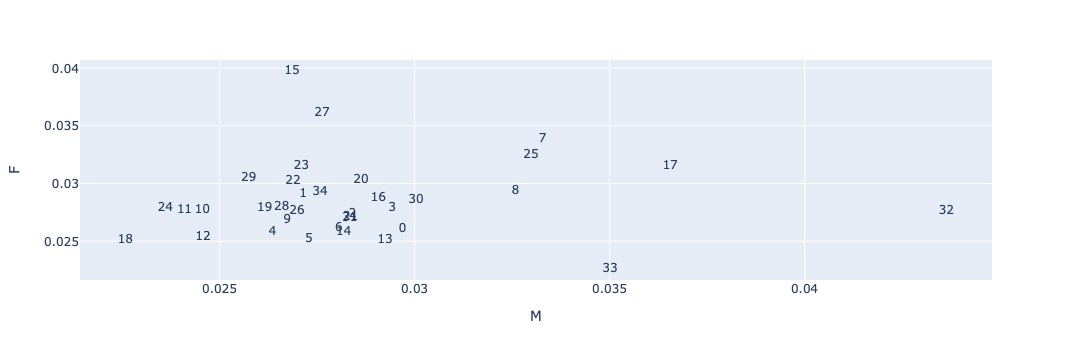

In [72]:
px.scatter(GENDER.reset_index(), 'M', 'F', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

### Analysis
The scatterplot of texts grouped by male and female authors reinforce the information provided in the gradient plots. The group of topics on the edges of the scatterplot that stand apart from the other topics, are the same as the top topics in texts by female authors, and by male authors. This graph helps visualize how the majority of topics in texts by male and female authors are more similar than different, based on how closely they are together grouped. Some of the most similar topics, that are most closely grouped together in the graph, include: (6) virtue, soul, desire, feeling, acts, labor, term, mans, conditions, domination, (14) hand, person, war, force, duty, art, friend, struggle, appearance, desires, (2) things, mother, years, rights, father, need, reflection, reasons, study, music, (21) happiness, nation, hands, circumstances, slave, conception, consequence, affection, wise, (31) truth, freedom, face, meaning, son, questions, step, womans, problems. 

#### Cluster

<Figure size 432x288 with 0 Axes>

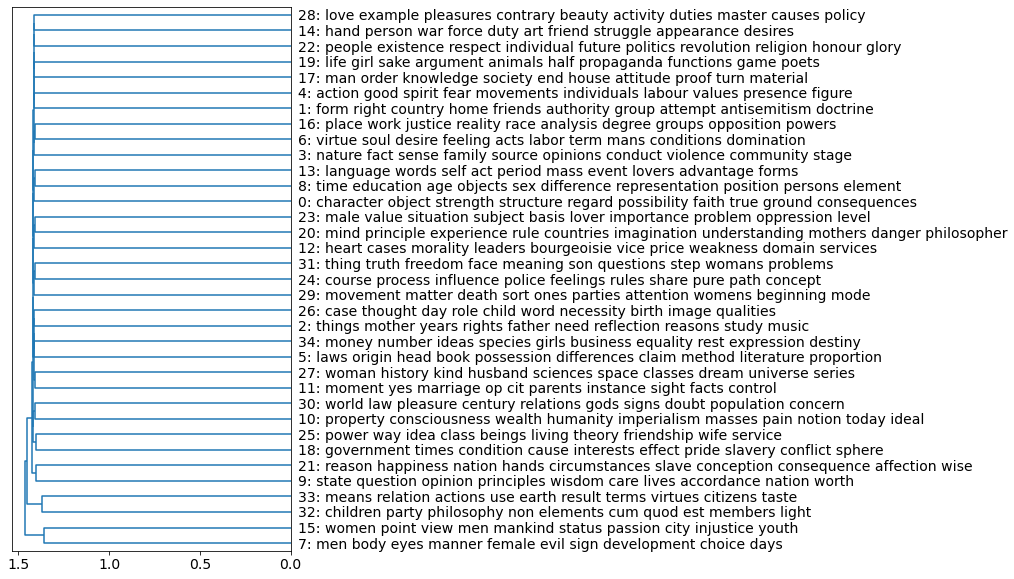

In [73]:
labels  = ["{}: {}".format(a,b) for a, b in zip(GENDER.index,  GENDER.topterms.tolist())]
plot_tree(TREE, labels)

### Explore Topics by Era

In [74]:
ERA = THETA.groupby('era')[topic_cols].mean().T                                            
ERA.index.name = 'topic_id'
ERA.T

topic_id,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
era,,,,,,,,,,,,,,,,,,,,,
ancient,0.026826,0.025032,0.030386,0.027106,0.026123,0.026677,0.030375,0.036011,0.029771,0.030370,...,0.029951,0.024424,0.022648,0.028486,0.024280,0.026536,0.028007,0.064518,0.041204,0.025844
classical,0.030005,0.028449,0.025651,0.033877,0.026190,0.027024,0.029252,0.031809,0.031822,0.027305,...,0.035439,0.025746,0.025807,0.029287,0.024222,0.028812,0.028710,0.026887,0.028530,0.029649
modern,0.027912,0.029171,0.027631,0.027781,0.026080,0.025977,0.025257,0.033084,0.031404,0.025193,...,0.033070,0.028962,0.037000,0.026129,0.030596,0.030717,0.027309,0.027509,0.024573,0.029053


In [75]:
ERA['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)
ERA.sort_values('modern', ascending=False).style.background_gradient()

era,ancient,classical,modern,topterms
topic_id,,,,
27,0.022648,0.025807,0.037000,woman history kind husband sciences space classes dream universe series
15,0.029621,0.030669,0.034846,women point view men mankind status passion city injustice youth
17,0.036257,0.033048,0.033743,man order knowledge society end house attitude proof turn material
7,0.036011,0.031809,0.033084,men body eyes manner female evil sign development choice days
25,0.029951,0.035439,0.033070,power way idea class beings living theory friendship wife service
23,0.024563,0.025085,0.032295,male value situation subject basis lover importance problem oppression level
8,0.029771,0.031822,0.031404,time education age objects sex difference representation position persons element
13,0.021299,0.023511,0.030940,language words self act period mass event lovers advantage forms
30,0.026536,0.028812,0.030717,world law pleasure century relations gods signs doubt population concern


In [76]:
ERA.sort_values('ancient', ascending=False).style.background_gradient()

era,ancient,classical,modern,topterms
topic_id,,,,
32,0.064518,0.026887,0.027509,children party philosophy non elements cum quod est members light
33,0.041204,0.028530,0.024573,means relation actions use earth result terms virtues citizens taste
17,0.036257,0.033048,0.033743,man order knowledge society end house attitude proof turn material
7,0.036011,0.031809,0.033084,men body eyes manner female evil sign development choice days
2,0.030386,0.025651,0.027631,things mother years rights father need reflection reasons study music
6,0.030375,0.029252,0.025257,virtue soul desire feeling acts labor term mans conditions domination
9,0.030370,0.027305,0.025193,state question opinion principles wisdom care lives accordance nation worth
25,0.029951,0.035439,0.033070,power way idea class beings living theory friendship wife service
8,0.029771,0.031822,0.031404,time education age objects sex difference representation position persons element


In [77]:
ERA.sort_values('classical', ascending=False).style.background_gradient()

era,ancient,classical,modern,topterms
topic_id,,,,
21,0.027947,0.037166,0.024857,reason happiness nation hands circumstances slave conception consequence affection wise
20,0.028489,0.036096,0.027756,mind principle experience rule countries imagination understanding mothers danger philosopher
25,0.029951,0.035439,0.033070,power way idea class beings living theory friendship wife service
3,0.027106,0.033877,0.027781,nature fact sense family source opinions conduct violence community stage
17,0.036257,0.033048,0.033743,man order knowledge society end house attitude proof turn material
8,0.029771,0.031822,0.031404,time education age objects sex difference representation position persons element
7,0.036011,0.031809,0.033084,men body eyes manner female evil sign development choice days
15,0.029621,0.030669,0.034846,women point view men mankind status passion city injustice youth
0,0.026826,0.030005,0.027912,character object strength structure regard possibility faith true ground consequences


### Analysis
The top topics for modern texts include: (27) woman, history, kind, husband, sciences, space, classes, dream, universe, series.
The top topics for classical texts include: (21) reason, happiness, nation, hands, circumstances, slave, conception, consequence, affection, wise, (20) mind, principle, experience, rule, countries, imagination, understanding, mothers, danger, philosopher. 
The top topics for ancient texts include: (32) children, party, philosophy, elements, members, light.

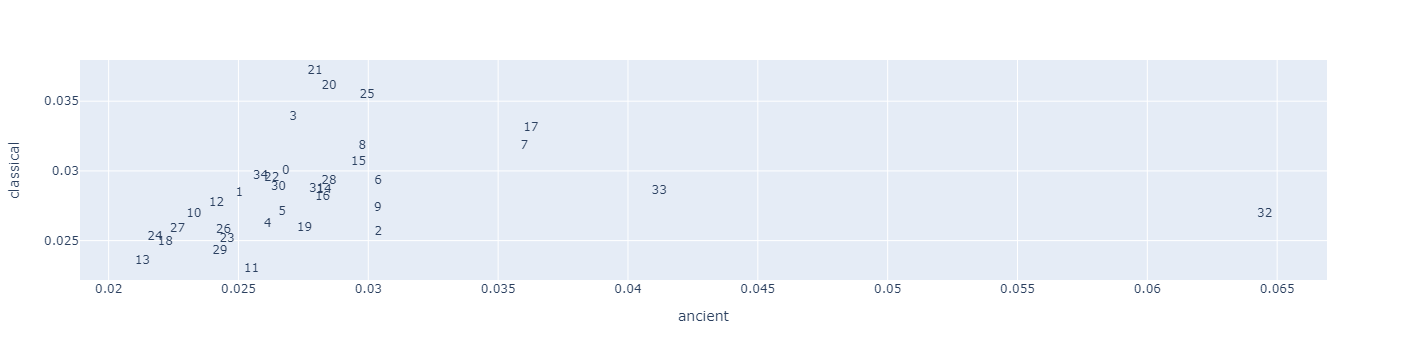

In [78]:
#scatter plot looking at distribution of topics of ancient and classical texts
px.scatter(ERA.reset_index(), 'ancient', 'classical', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

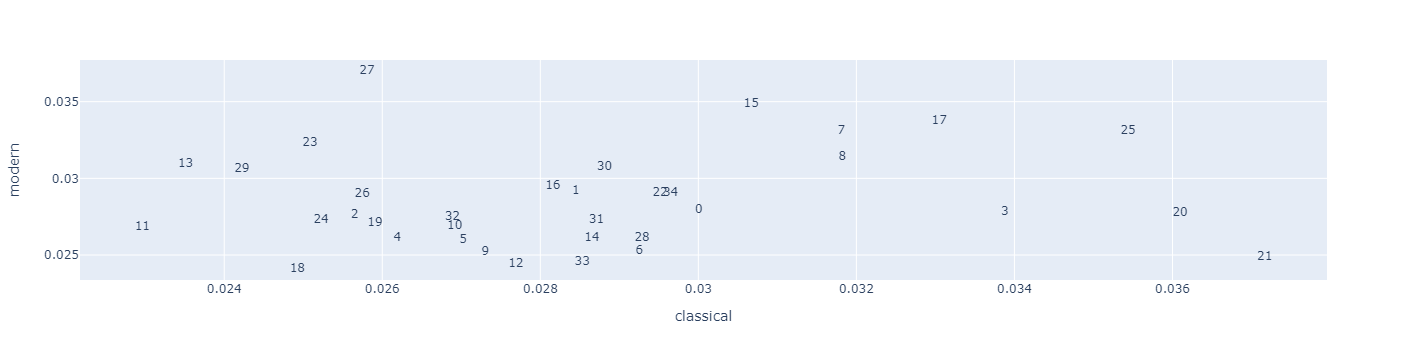

In [79]:
#scatter plot looking at distribution of topics of classical and modern texts
px.scatter(ERA.reset_index(), 'classical', 'modern', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

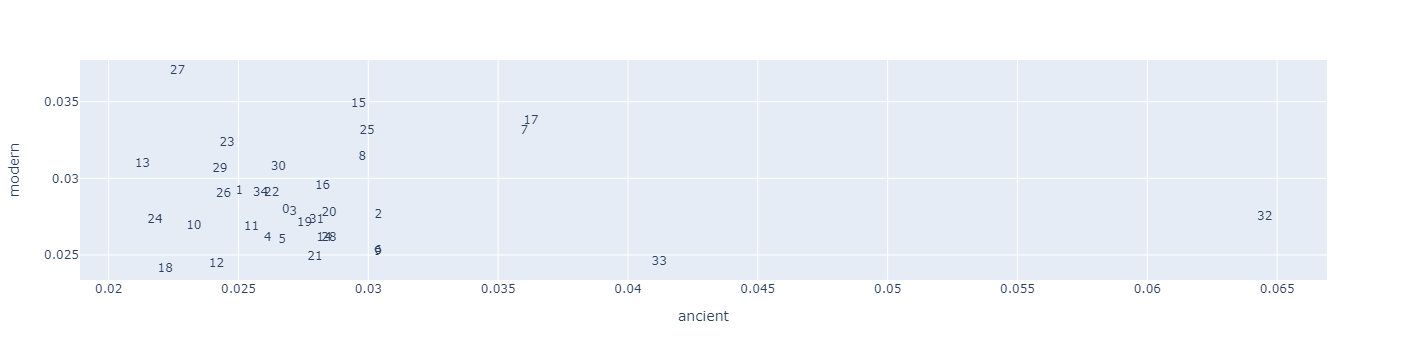

In [80]:
#scatter plot looking at distribution of topics of ancient and modern texts
px.scatter(ERA.reset_index(), 'ancient', 'modern', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

<Figure size 432x288 with 0 Axes>

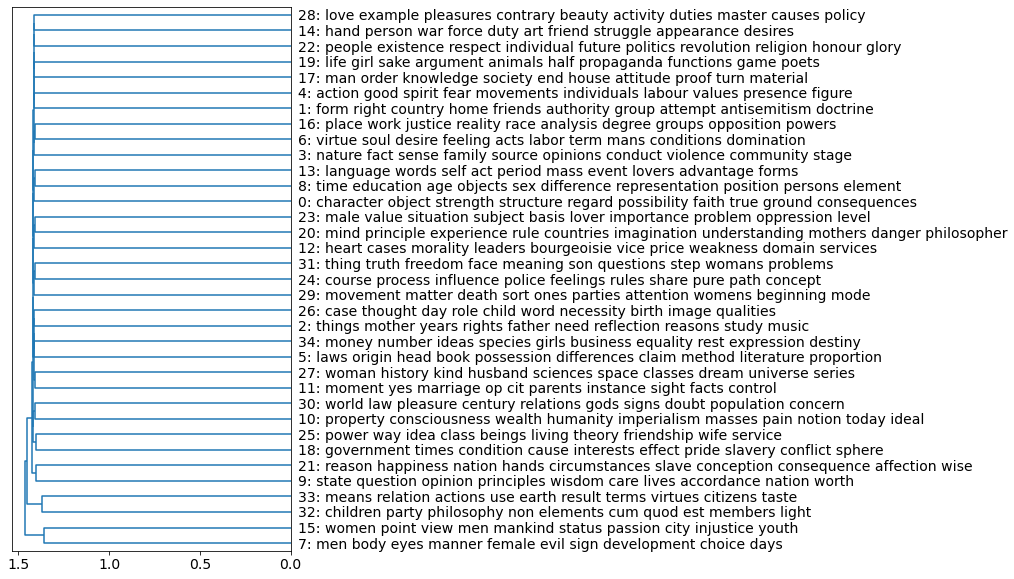

In [81]:
labels  = ["{}: {}".format(a,b) for a, b in zip(ERA.index,  ERA.topterms.tolist())]
plot_tree(TREE, labels)

### Analysis
There is a close relationship between the topics in ancient and classical texts. There are a few outliers (32, 33), but as a whole, classical and ancient texts have a lot of overlap in topics. Alternatively, there is a very wide distribution between the topics seen in modern and classical texts. This may be surprising, since modern and classical texts are closer in eras, and would perhaps have more in common than with ancient texts. Interestingly, this is not the case. Modern and ancient text topics appear to have the most similarities, excluding a few outliers (32, 33). This is an example of how patterns in culture can be revealed and discovered through text analytics. There are more similarities between ancient philosophical and modern texts than classical texts. This is likely because when philosophers were writing in ancient Greece and Rome, it was a period of stability. This could be said about modern times. But for classical times, between 1700 and 1900, this was a time of great societal upheavel. Many of the philosophers in the classical era were taking a close look at themselves, at society, and at humany nature. These authors were critiquing the governement systems, monarchy, and the rapid changes that were happening within the world.